# 📘 Assignment: PCA & Clustering on Wine Dataset
##  Background & Objective
The Wine dataset contains the results of chemical analysis of wines derived from three cultivars grown in the same region of Italy.
It has 178 records with 13 chemical features and a categorical target column Type.
The objectives of this analysis are:
1.	Perform Exploratory Data Analysis (EDA) to understand the dataset.
2.	Apply Principal Component Analysis (PCA) for dimensionality reduction.
3.	Perform KMeans clustering on both the original and PCA-transformed datasets.
4.	Compare clustering performance using Silhouette Score and Davies–Bouldin Index (DBI).
5.	Draw final conclusions about the usefulness of PCA in clustering tasks.


## 1. Import Required Libraries

In [1]:

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


## 2. Load Dataset

In [2]:

# 2. Load Dataset
file_path="D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\PCA\wine.csv"
df = pd.read_csv(file_path)   # Replace with your dataset path
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  

•	Dataset shape: (178, 14) → 13 features + 1 target.
•	No missing values.
•	Features include Alcohol, Malic Acid, Ash, Magnesium, Flavanoids, Proline, etc.
 Inference: The dataset is clean and ready for analysis.


In [7]:

# Separate features and target
X = df.drop("Type", axis=1)  # features
y = df["Type"]               # target class


## 3. Exploratory Data Analysis (EDA)



In [8]:

# 3. Exploratory Data Analysis (EDA)
print("\nShape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDescriptive statistics:\n", X.describe().T)



Shape of dataset: (178, 14)

Missing values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Descriptive statistics:
                  count        mean         std     min       25%      50%  \
Alcohol          178.0   13.000618    0.811827   11.03   12.3625   13.050   
Malic            178.0    2.336348    1.117146    0.74    1.6025    1.865   
Ash              178.0    2.366517    0.274344    1.36    2.2100    2.360   
Alcalinity       178.0   19.494944    3.339564   10.60   17.2000   19.500   
Magnesium        178.0   99.741573   14.282484   70.00   88.0000   98.000   
Phenols          178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids       178.0    2.029270    0.998859    0.34    1.2050    2.135   
Nonf

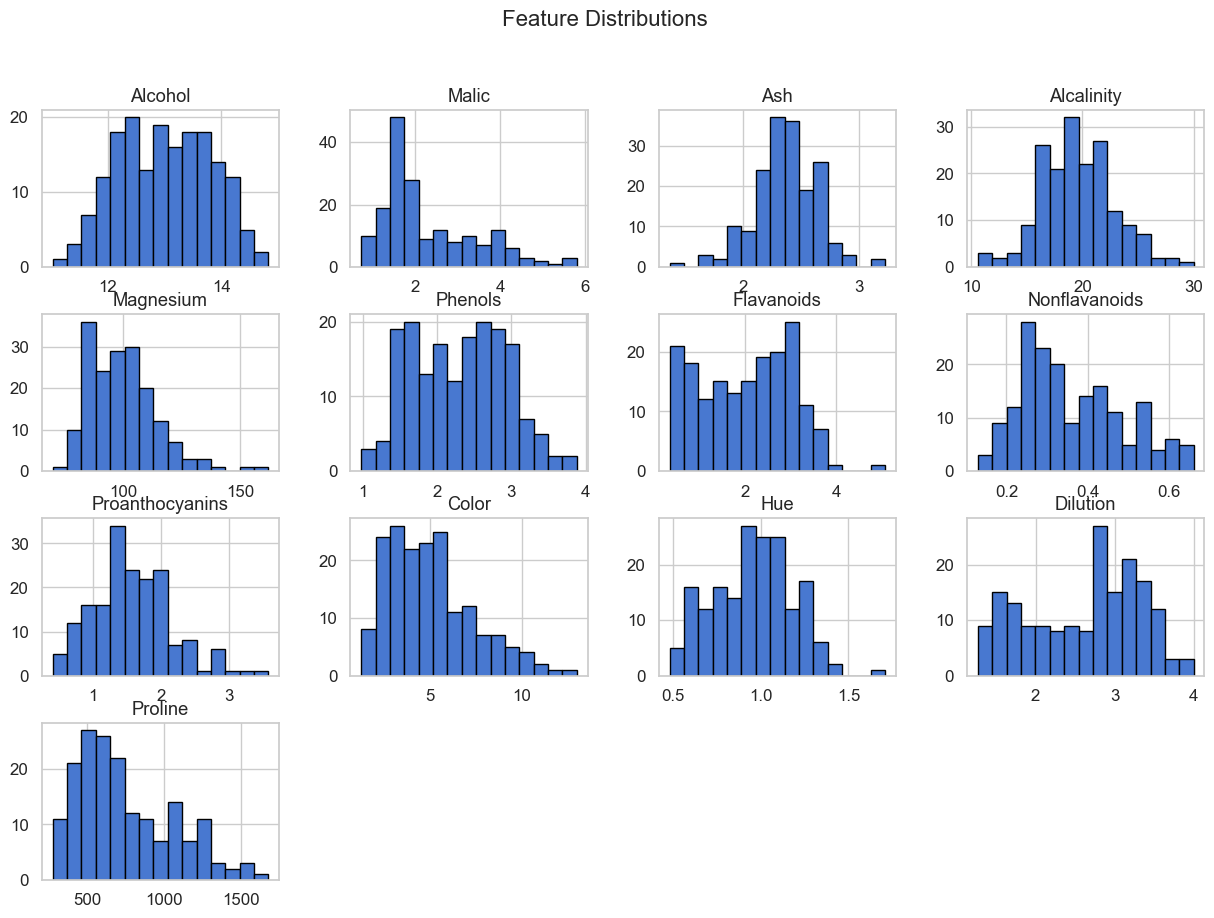

In [9]:

# Histograms
X.hist(figsize=(15, 10), bins=15, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


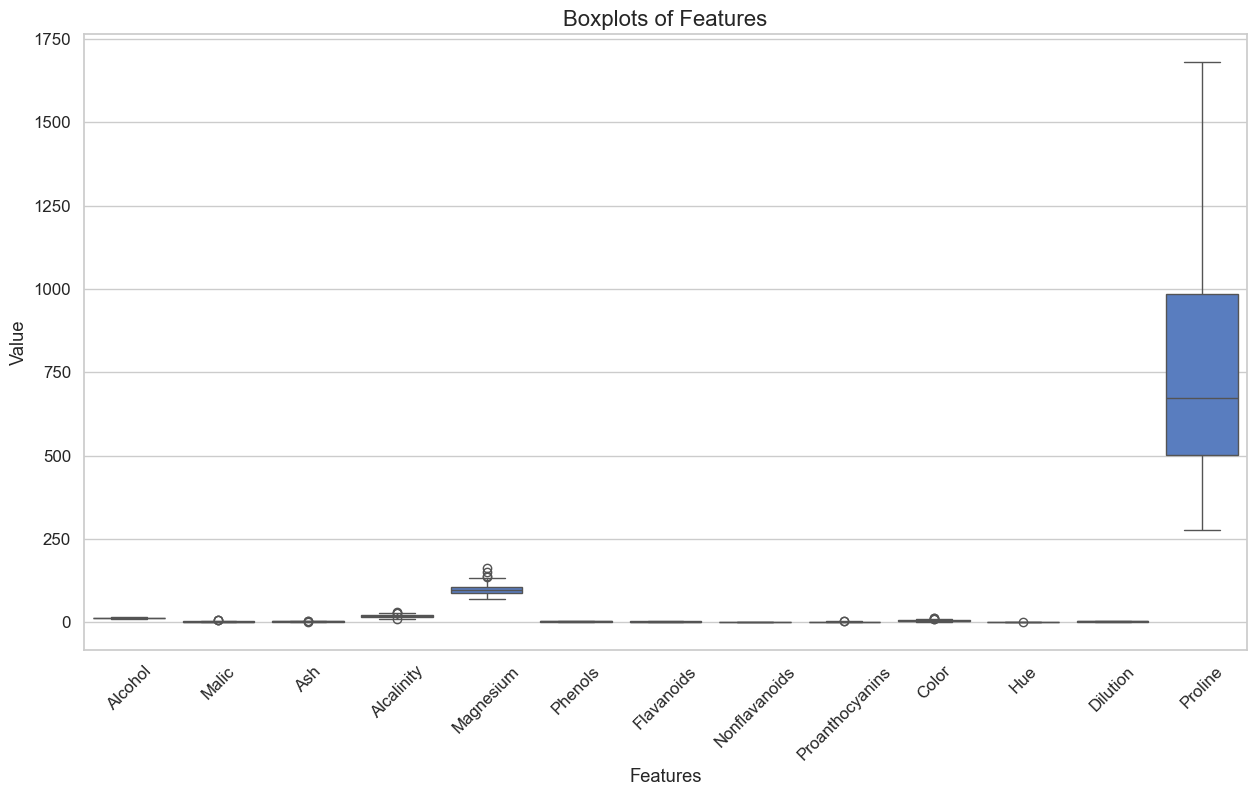

In [10]:

# Boxplots
plt.figure(figsize=(15, 8))
df_melt = X.melt(var_name="Features", value_name="Value")
sns.boxplot(data=df_melt, x="Features", y="Value")
plt.xticks(rotation=45)
plt.title("Boxplots of Features", fontsize=16)
plt.show()


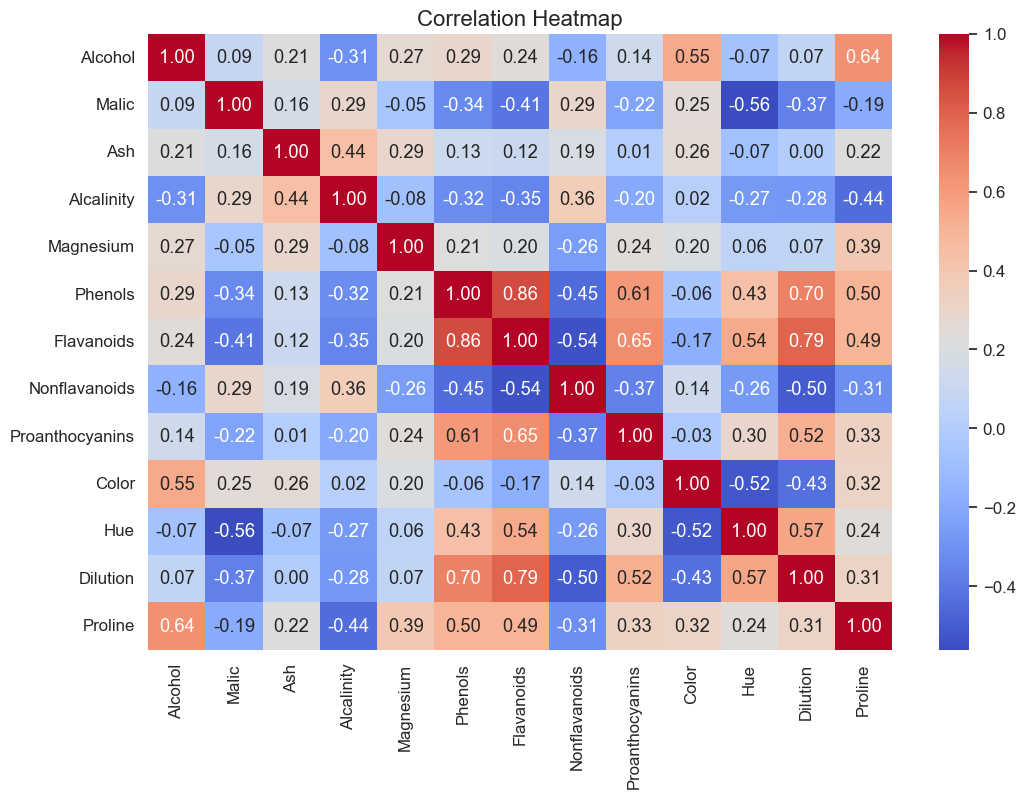

In [11]:

# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()



📌 Inference:
Some features are highly correlated → dimensionality reduction with PCA will be useful.


 ## 4. Standardize Data

In [12]:

# 4. Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### Explanation:
Standardization ensures all features have mean = 0 and standard deviation = 1, making them comparable before PCA.


## 5. PCA - Dimensionality Reduction

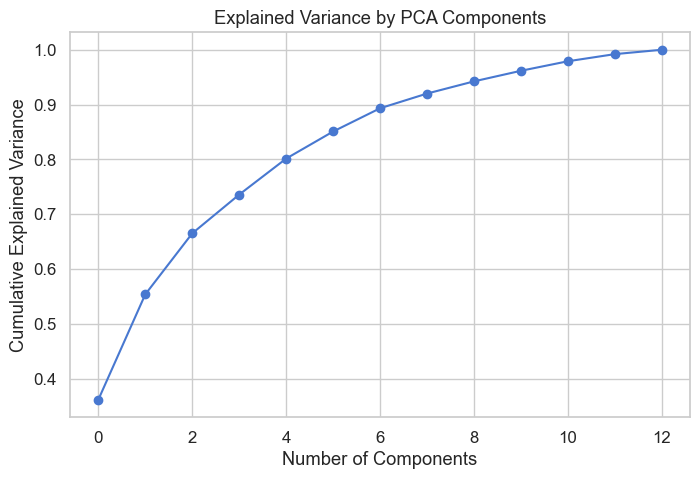


Explained variance ratio:
 [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

Cumulative variance explained:
 [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]

Optimal number of components (95% variance): 10


In [13]:

# 5. PCA - Dimensionality Reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained Variance
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

print("\nExplained variance ratio:\n", explained_variance)
print("\nCumulative variance explained:\n", np.cumsum(explained_variance))

# Choose optimal number of components (keep 95% variance)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print("\nOptimal number of components (95% variance):", n_components)

# Transform data using optimal components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)


•	First component = 36% variance.
•	First 10 components ≈ 95% variance.
•	Optimal components selected = 10.
📌 Inference: Reduced features 13 → 10 PCs while retaining most of the dataset’s information.


## 6. Clustering with Original Data


--- Clustering on Original Data ---
Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181648


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


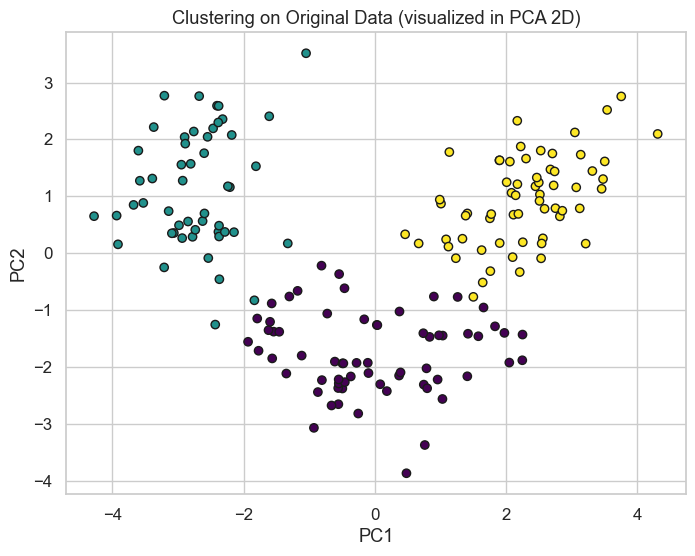

In [14]:

# 6. Clustering with Original Data
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(X_scaled)

sil_original = silhouette_score(X_scaled, labels_original)
dbi_original = davies_bouldin_score(X_scaled, labels_original)

print("\n--- Clustering on Original Data ---")
print("Silhouette Score:", sil_original)
print("Davies-Bouldin Index:", dbi_original)

# Visualization (using first 2 PCA components for plotting)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_original, cmap="viridis", edgecolor="k")
plt.title("Clustering on Original Data (visualized in PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


•	Silhouette Score ≈ 0.285

•	DBI ≈ 1.389

📌 Inference: Clusters exist but overlap significantly.


## 7. Clustering with PCA Data


--- Clustering on PCA Data ---
Silhouette Score: 0.2986748294369289
Davies-Bouldin Index: 1.3363263335155764


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


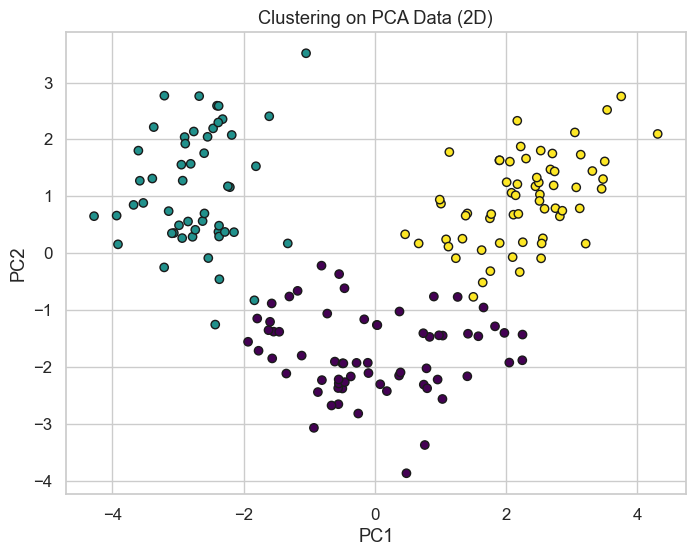

In [15]:

# 7. Clustering with PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_final)

sil_pca = silhouette_score(X_pca_final, labels_pca)
dbi_pca = davies_bouldin_score(X_pca_final, labels_pca)

print("\n--- Clustering on PCA Data ---")
print("Silhouette Score:", sil_pca)
print("Davies-Bouldin Index:", dbi_pca)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=labels_pca, cmap="viridis", edgecolor="k")
plt.title("Clustering on PCA Data (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


•	Silhouette Score ≈ 0.299

•	DBI ≈ 1.336

📌 Inference: PCA clustering is slightly better (higher silhouette, lower DBI).


## 8. Comparison & Analysis

In [16]:

# 8. Comparison & Analysis
print("\n--- Comparison ---")
print("Original Data: Silhouette =", sil_original, ", DBI =", dbi_original)
print("PCA Data     : Silhouette =", sil_pca, ", DBI =", dbi_pca)

if sil_pca > sil_original:
    print("\n PCA improved clustering quality!")
else:
    print("\n Clustering on original data worked better.")




--- Comparison ---
Original Data: Silhouette = 0.2848589191898987 , DBI = 1.3891879777181648
PCA Data     : Silhouette = 0.2986748294369289 , DBI = 1.3363263335155764

 PCA improved clustering quality!


•	Original Data → Silhouette = 0.285 , DBI = 1.389

•	PCA Data → Silhouette = 0.299 , DBI = 1.336

•	✅ PCA improved clustering quality!


## 📝 9. Conclusion
1.	PCA reduced dimensions from 13 to 10 while retaining 95% variance.
2.	Clustering performance on PCA data was slightly better (Silhouette ↑, DBI ↓).
3.	PCA also helps reduce noise, redundancy, and speeds up computation.
4.	PCA is most useful when features are many and correlated.
